# Hedonic Pricing

We often try to predict the price of an asset from its observable characteristics. This is generally called **hedonic pricing**: How do the unit's characteristics determine its market price?

In the lab folder, there are three options: housing prices in pierce_county_house_sales.csv, car prices in cars_hw.csv, and airbnb rental prices in airbnb_hw.csv. If you know of another suitable dataset, please feel free to use that one.

1. Clean the data and perform some EDA and visualization to get to know the data set.
2. Transform your variables --- particularly categorical ones --- for use in your regression analysis.
3. Implement an ~80/~20 train-test split. Put the test data aside.
4. Build some simple linear models that include no transformations or interactions. Fit them, and determine their RMSE and $R^2$ on the both the training and test sets. Which of your models does the best?
5. Include transformations and interactions, and build a more complex model that reflects your ideas about how the features of the asset determine its value. Determine its RMSE and $R^2$ on the training and test sets. How does the more complex model your build compare to the simpler ones?
6. Summarize your results from 1 to 5. Have you learned anything about overfitting and underfitting, or model selection?
7. If you have time, use the sklearn.linear_model.Lasso to regularize your model and select the most predictive features. Which does it select? What are the RMSE and $R^2$? We'll cover the Lasso later in detail in class.



In [3]:
# Import and clean data
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('cars_hw.csv')
df.head()

,Unnamed: 0,Make,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Transmission,Transmission_Type,Price
0,1,Volkswagen,2017,silver,sedan,44611,1st,5,diesel,7-Speed,Automatic,657000
1,2,Hyundai,2016,red,crossover,20305,1st,5,petrol,5-Speed,Manual,682000
2,3,Honda,2019,white,suv,29540,2nd,5,petrol,5-Speed,Manual,793000
3,4,Renault,2017,bronze,hatchback,35680,1st,5,petrol,5-Speed,Manual,414000
4,5,Hyundai,2017,orange,hatchback,25126,1st,5,petrol,5-Speed,Manual,515000


Index(['Unnamed: 0', 'Make', 'Make_Year', 'Color', 'Body_Type', 'Mileage_Run',
       'No_of_Owners', 'Seating_Capacity', 'Fuel_Type', 'Transmission',
       'Transmission_Type', 'Price'],
      dtype='object')


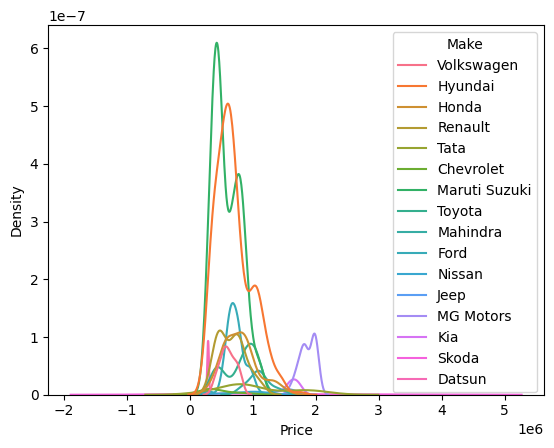

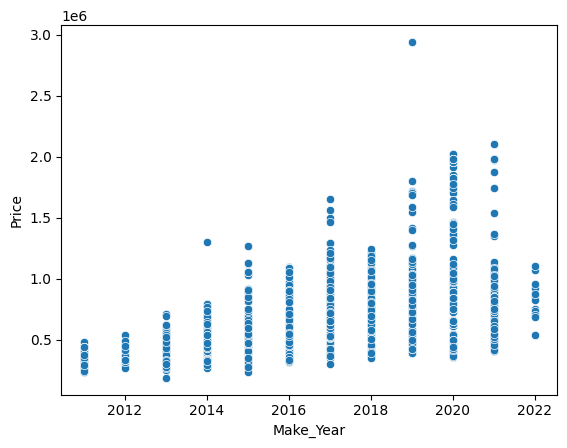

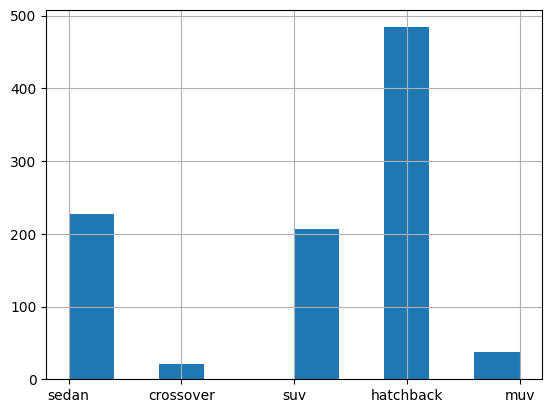

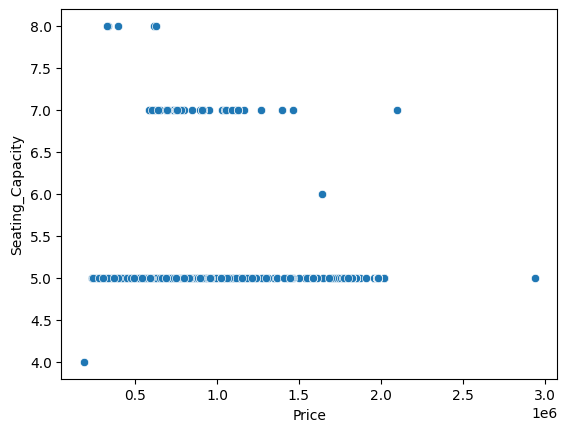

In [4]:
# Column names and exploring variables
print(df.columns)

# Kernel density plots
# Make by price
sns.kdeplot(x=df['Price'], hue=df['Make'])
plt.show()

# Price and year
sns.scatterplot(x=df['Make_Year'], y=df['Price'])
plt.show()

# Body Type Options
df['Body_Type'].hist()
plt.show()

# Price by seating capacity
sns.scatterplot(x=df['Price'], y=df['Seating_Capacity'])
plt.show()


In [5]:
# Check for missing values
df.isna().sum()

,0
Unnamed: 0,0
Make,0
Make_Year,0
Color,0
Body_Type,0
Mileage_Run,0
No_of_Owners,0
Seating_Capacity,0
Fuel_Type,0
Transmission,0


In [6]:
# Transform categorical variables (of interest) for use in regression
# Make
X1 = pd.get_dummies(df['Make'], dtype=float)
# Body Type
X2 = pd.get_dummies(df['Body_Type'], dtype=float)
# Transmission Type
X3 = pd.get_dummies(df['Transmission_Type'], dtype=float)

print(X1)
print(X2)
print(X3)

# Add to dataframe
df = pd.concat([df, X1, X2, X3], axis=1)

     Chevrolet  Datsun  Ford  Honda  Hyundai  Jeep  Kia  MG Motors  Mahindra  \
0          0.0     0.0   0.0    0.0      0.0   0.0  0.0        0.0       0.0   
1          0.0     0.0   0.0    0.0      1.0   0.0  0.0        0.0       0.0   
2          0.0     0.0   0.0    1.0      0.0   0.0  0.0        0.0       0.0   
3          0.0     0.0   0.0    0.0      0.0   0.0  0.0        0.0       0.0   
4          0.0     0.0   0.0    0.0      1.0   0.0  0.0        0.0       0.0   
..         ...     ...   ...    ...      ...   ...  ...        ...       ...   
971        0.0     0.0   0.0    0.0      1.0   0.0  0.0        0.0       0.0   
972        0.0     0.0   0.0    0.0      1.0   0.0  0.0        0.0       0.0   
973        0.0     0.0   0.0    0.0      1.0   0.0  0.0        0.0       0.0   
974        0.0     0.0   1.0    0.0      0.0   0.0  0.0        0.0       0.0   
975        0.0     0.0   0.0    0.0      0.0   0.0  0.0        0.0       0.0   

     Maruti Suzuki  Nissan  Renault  Sk

In [8]:
df.head()
print(df.columns)

Index(['Unnamed: 0', 'Make', 'Make_Year', 'Color', 'Body_Type', 'Mileage_Run',
       'No_of_Owners', 'Seating_Capacity', 'Fuel_Type', 'Transmission',
       'Transmission_Type', 'Price', 'Chevrolet', 'Datsun', 'Ford', 'Honda',
       'Hyundai', 'Jeep', 'Kia', 'MG Motors', 'Mahindra', 'Maruti Suzuki',
       'Nissan', 'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen',
       'crossover', 'hatchback', 'muv', 'sedan', 'suv', 'Automatic', 'Manual'],
      dtype='object')


In [11]:
# Create 80/20 train-test split
from sklearn.model_selection import train_test_split
from sklearn import linear_model
y = df['Price']
X = df[['Make_Year']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

Z_train = X_train
Z_test = X_test

reg = linear_model.LinearRegression(fit_intercept=False).fit(Z_train,y_train) # Run regression

y_hat = reg.predict(Z_test)
print('Rsq: ', reg.score(Z_test,y_test))
rmse = np.sqrt(np.mean((y_test - y_hat)**2))
print('RMSE: ', rmse)

results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_}) # Regression coefficients
results

Rsq:  0.0021249217972528767
RMSE:  370158.66620115977


,variable,coefficient
0,Make_Year,366.513044


- HORRENDOUS RMSE: The average error between predicted and actual prices of cars based on make year is 370,158.
- Rsq: Model explains about 21% of the variance in in price based on the make year.
- This is surprising to me, as there seemed to be a positive correlation between make_year and price in the EDA.


In [19]:
y = df['Price']
X = df[['Make']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

# Get all unique makes from the **training** data
all_makes = pd.unique(X_train['Make'])

# Create dummy variables with all unique makes for both training and testing data
# Ensure both use the same columns and handle missing values
Z_train = pd.get_dummies(X_train['Make'], columns=all_makes, dummy_na=False).reindex(columns=all_makes, fill_value=0)
Z_test = pd.get_dummies(X_test['Make'], columns=all_makes, dummy_na=False).reindex(columns=all_makes, fill_value=0)

reg = linear_model.LinearRegression(fit_intercept=False).fit(Z_train,y_train) # Run regression

y_hat = reg.predict(Z_test)
print('Rsq: ', reg.score(Z_test,y_test))
rmse = np.sqrt(np.mean((y_test - y_hat)**2))
print('RMSE: ', rmse)

results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_}) # Regression coefficients
results


Rsq:  0.568455539322757
RMSE:  243423.55834632888


,variable,coefficient
0,Hyundai,6.947542e+05
1,Honda,8.146271e+05
2,MG Motors,1.876800e+06
3,Renault,6.687458e+05
4,Ford,7.355854e+05
5,Volkswagen,5.967368e+05
6,Maruti Suzuki,5.781772e+05
7,Tata,1.104833e+06
8,Toyota,8.143500e+05
9,Mahindra,1.094062e+06


- Also has an incredibly high RMSE of 243,423.
- Rsq = 0.56

In [22]:
# Combining both make_year and make as predictors
y = df['Price']
X = df.loc[:,['Make_Year', 'Make']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

# Get all unique makes from the training data
all_makes = pd.unique(X_train['Make'])

# Create dummy variables with all unique makes for both training and testing data
# Ensure both use the same columns and handle missing values
Z_train = pd.concat([X_train['Make_Year'],
                     pd.get_dummies(X_train['Make'], columns=all_makes, dummy_na=False).reindex(columns=all_makes, fill_value=0)], axis = 1)
Z_test = pd.concat([X_test['Make_Year'],
                     pd.get_dummies(X_test['Make'], columns=all_makes, dummy_na=False).reindex(columns=all_makes, fill_value=0)], axis = 1)


reg = linear_model.LinearRegression(fit_intercept=False).fit(Z_train,y_train) # Run regression

y_hat = reg.predict(Z_test)
print('Rsq: ', reg.score(Z_test,y_test))
rmse = np.sqrt(np.mean((y_test - y_hat)**2))
print('RMSE: ', rmse)

results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_}) # Regression coefficients
results

Rsq:  0.7201661248093821
RMSE:  196019.81581625412


,variable,coefficient
0,Make_Year,5.297932e+04
1,Hyundai,-1.061321e+08
2,Honda,-1.060518e+08
3,MG Motors,-1.051414e+08
4,Renault,-1.062794e+08
5,Ford,-1.061431e+08
6,Volkswagen,-1.061427e+08
7,Maruti Suzuki,-1.062626e+08
8,Tata,-1.059104e+08
9,Toyota,-1.060860e+08


- RMSE still incredibly high (= 196,019), yet reduced from the first two single variable models.

In [24]:
# Adding mileage_run and body_type as predictors
y = df['Price']
X = df.loc[:,['Make_Year', 'Make', 'Mileage_Run', 'Body_Type']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

# Get all unique makes from the training data
all_makes = pd.unique(X_train['Make'])

# Create dummy variables with all unique makes for both training and testing data
# Ensure both use the same columns and handle missing values
Z_train = pd.concat([X_train['Make_Year'],
                     pd.get_dummies(X_train['Make'], columns=all_makes, dummy_na=False).reindex(columns=all_makes, fill_value=0),
                     X_train['Mileage_Run'], pd.get_dummies(X_train['Body_Type'])], axis = 1)
Z_test = pd.concat([X_test['Make_Year'],
                     pd.get_dummies(X_test['Make'], columns=all_makes, dummy_na=False).reindex(columns=all_makes, fill_value=0),
                     X_test['Mileage_Run'], pd.get_dummies(X_test['Body_Type'])], axis = 1)

reg = linear_model.LinearRegression(fit_intercept=False).fit(Z_train,y_train) # Run regression

y_hat = reg.predict(Z_test)
print('Rsq: ', reg.score(Z_test,y_test))
rmse = np.sqrt(np.mean((y_test - y_hat)**2))
print('RMSE: ', rmse)

results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_}) # Regression coefficients
results

Rsq:  0.8280710984543578
RMSE:  153647.06818145016


,variable,coefficient
0,Make_Year,4.890951e+04
1,Hyundai,-2.336378e+07
2,Honda,-2.338248e+07
3,MG Motors,-2.264317e+07
4,Renault,-2.356831e+07
5,Ford,-2.352732e+07
6,Volkswagen,-2.337582e+07
7,Maruti Suzuki,-2.344609e+07
8,Tata,-2.324472e+07
9,Toyota,-2.333403e+07


- Again, RMSE reduced yet still very high: 153,647.

6. The models with single variables to explain price had very high RMSE's, and were reduced by combining the predictive variables. Adding additional variables continued to bring the RMSE down, though the value was still incredibly large. This may be due to outliers, or underfitting (?). Continuing to add additonal variables to the same model may lead to an increase in Rsq, as inlcuding all of the variables would, in fact, lead to overfitting.